## Plot adjustments of remapped air-sea CO2 fluxes from OTM runs with different priors

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
## Suppress warnings related to division by zero
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import gridspec
from tqdm.notebook import tqdm
from scipy.interpolate import griddata

In [3]:
yr2sec=365.25*24*3600

In [4]:
# Load and process true prior flux run

OTM_remapped=xr.open_mfdataset('true_remapped.nc')

dC_adj_remapped=OTM_remapped.dC_adj_remapped
dC_Cflux_remapped=OTM_remapped.dC_Cflux_remapped
dC_prior_remapped=OTM_remapped.dC_prior_remapped

dC_adj_int=(dC_adj_remapped*OTM_remapped.drF).sum('k')
dC_Cflux_int=(dC_Cflux_remapped*OTM_remapped.drF).sum('k')
dC_prior_int=(dC_prior_remapped*OTM_remapped.drF).sum('k')

lat=OTM_remapped.YC.values.flatten()
lon=OTM_remapped.XC.values.flatten()
lon[np.where(lon>180)]=lon[np.where(lon>180)]-360

(LAT,LON)=np.meshgrid(np.arange(-90,90),np.arange(-180,180))

dC_OTM_interp=griddata((lon,lat),(dC_prior_int+dC_adj_int).values.flatten(),(LON,LAT))
dC_Cflux_interp=griddata((lon,lat),dC_Cflux_int.values.flatten(),(LON,LAT))
dC_prior_interp=griddata((lon,lat),dC_prior_int.values.flatten(),(LON,LAT))

dC_OTM_flux_true=dC_OTM_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
dC_prior_flux_true=dC_prior_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr

dC_Cflux_flux=dC_Cflux_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr


In [14]:
# Load and process no prior run

OTM_remapped=xr.open_mfdataset('noprior_remapped.nc')

dC_adj_remapped=OTM_remapped.dC_adj_remapped
#dC_prior_remapped=OTM_remapped.dC_prior_remapped

dC_adj_int=(dC_adj_remapped*OTM_remapped.drF).sum('k')
#dC_prior_int=(dC_prior_remapped*OTM_remapped.drF).sum('k')

lat=OTM_remapped.YC.values.flatten()
lon=OTM_remapped.XC.values.flatten()
lon[np.where(lon>180)]=lon[np.where(lon>180)]-360

(LAT,LON)=np.meshgrid(np.arange(-90,90),np.arange(-180,180))

dC_OTM_interp=griddata((lon,lat),(dC_adj_int).values.flatten(),(LON,LAT))
#dC_prior_interp=griddata((lon,lat),dC_prior_int.values.flatten(),(LON,LAT))

dC_OTM_flux_noprior=dC_OTM_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
dC_prior_flux_noprior=np.zeros_like(dC_OTM_flux_noprior)


In [6]:
# Load and process upper bound run

OTM_remapped=xr.open_mfdataset('ub2_v2_remapped.nc')

dC_adj_remapped=OTM_remapped.dC_adj_remapped
dC_prior_remapped=OTM_remapped.dC_prior_remapped

dC_adj_int=(dC_adj_remapped*OTM_remapped.drF).sum('k')
dC_prior_int=(dC_prior_remapped*OTM_remapped.drF).sum('k')

lat=OTM_remapped.YC.values.flatten()
lon=OTM_remapped.XC.values.flatten()
lon[np.where(lon>180)]=lon[np.where(lon>180)]-360

(LAT,LON)=np.meshgrid(np.arange(-90,90),np.arange(-180,180))

dC_OTM_interp=griddata((lon,lat),(dC_prior_int+dC_adj_int).values.flatten(),(LON,LAT))
dC_prior_interp=griddata((lon,lat),dC_prior_int.values.flatten(),(LON,LAT))

dC_OTM_flux_ub=dC_OTM_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
dC_prior_flux_ub=dC_prior_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr


In [12]:
# Load and process lower bound run

OTM_remapped=xr.open_mfdataset('lb2_v2_remapped.nc')

dC_adj_remapped=OTM_remapped.dC_adj_remapped
dC_prior_remapped=OTM_remapped.dC_prior_remapped

dC_adj_int=(dC_adj_remapped*OTM_remapped.drF).sum('k')
dC_prior_int=(dC_prior_remapped*OTM_remapped.drF).sum('k')

lat=OTM_remapped.YC.values.flatten()
lon=OTM_remapped.XC.values.flatten()
lon[np.where(lon>180)]=lon[np.where(lon>180)]-360

(LAT,LON)=np.meshgrid(np.arange(-90,90),np.arange(-180,180))

dC_OTM_interp=griddata((lon,lat),(dC_prior_int+dC_adj_int).values.flatten(),(LON,LAT))
dC_prior_interp=griddata((lon,lat),dC_prior_int.values.flatten(),(LON,LAT))

dC_OTM_flux_lb=dC_OTM_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
dC_prior_flux_lb=dC_prior_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr


In [8]:
# Load and process enhanced error run

OTM_remapped=xr.open_mfdataset('enhanced2xerr_v2_remapped.nc')

dC_adj_remapped=OTM_remapped.dC_adj_remapped
dC_prior_remapped=OTM_remapped.dC_prior_remapped

dC_adj_int=(dC_adj_remapped*OTM_remapped.drF).sum('k')
dC_prior_int=(dC_prior_remapped*OTM_remapped.drF).sum('k')

lat=OTM_remapped.YC.values.flatten()
lon=OTM_remapped.XC.values.flatten()
lon[np.where(lon>180)]=lon[np.where(lon>180)]-360

(LAT,LON)=np.meshgrid(np.arange(-90,90),np.arange(-180,180))

dC_OTM_interp=griddata((lon,lat),(dC_prior_int+dC_adj_int).values.flatten(),(LON,LAT))
dC_prior_interp=griddata((lon,lat),dC_prior_int.values.flatten(),(LON,LAT))

dC_OTM_flux_err=dC_OTM_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
dC_prior_flux_err=dC_prior_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr


In [2]:
# Plot

fig = plt.figure(figsize = (20,18.75))

gs = gridspec.GridSpec(5,3)
gs.update(wspace = 0.05, hspace=0.05)
fs=15

ax1 = plt.subplot(gs[0,0], projection=ccrs.Robinson(central_longitude=0))
ax2 = plt.subplot(gs[0,1], projection=ccrs.Robinson(central_longitude=0))
ax3 = plt.subplot(gs[0,2], projection=ccrs.Robinson(central_longitude=0))

ax4 = plt.subplot(gs[1,0], projection=ccrs.Robinson(central_longitude=0))
ax5 = plt.subplot(gs[1,1], projection=ccrs.Robinson(central_longitude=0))
ax6 = plt.subplot(gs[1,2], projection=ccrs.Robinson(central_longitude=0))

ax7 = plt.subplot(gs[2,0], projection=ccrs.Robinson(central_longitude=0))
ax8 = plt.subplot(gs[2,1], projection=ccrs.Robinson(central_longitude=0))
ax9 = plt.subplot(gs[2,2], projection=ccrs.Robinson(central_longitude=0))

ax10 = plt.subplot(gs[3,0], projection=ccrs.Robinson(central_longitude=0))
ax11 = plt.subplot(gs[3,1], projection=ccrs.Robinson(central_longitude=0))
ax12 = plt.subplot(gs[3,2], projection=ccrs.Robinson(central_longitude=0))

ax13 = plt.subplot(gs[4,0], projection=ccrs.Robinson(central_longitude=0))
ax14 = plt.subplot(gs[4,1], projection=ccrs.Robinson(central_longitude=0))
ax15 = plt.subplot(gs[4,2], projection=ccrs.Robinson(central_longitude=0))


minv1, maxv1 = -5,5
minv2, maxv2 = -5,5

cax = fig.add_axes([0.93, 0.32, 0.015, 0.36])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv1, maxv1)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('Carbon flux (mol-C m$^{-2}$ yr$^{-1})$',fontsize=fs)

# No prior

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, dC_prior_flux_noprior-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('Prior - ECCO Darwin',fontsize=fs)

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, dC_OTM_flux_noprior-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('OTM solution - ECCO Darwin',fontsize=fs)

ax3.stock_img()
ax3.coastlines(zorder=101)
ax3.pcolormesh(LON, LAT, dC_OTM_flux_noprior, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax3.add_feature(cfeature.LAND, zorder=100)
ax3.set_title('OTM solution',fontsize=fs)

# True prior

ax4.stock_img()
ax4.coastlines(zorder=101)
ax4.pcolormesh(LON, LAT, dC_prior_flux_true-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax4.add_feature(cfeature.LAND, zorder=100)

ax5.stock_img()
ax5.coastlines(zorder=101)
ax5.pcolormesh(LON, LAT, dC_OTM_flux_true-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax5.add_feature(cfeature.LAND, zorder=100)

ax6.stock_img()
ax6.coastlines(zorder=101)
ax6.pcolormesh(LON, LAT, dC_OTM_flux_true, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax6.add_feature(cfeature.LAND, zorder=100)

# Lower bound

ax7.stock_img()
ax7.coastlines(zorder=101)
ax7.pcolormesh(LON, LAT, dC_prior_flux_lb-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax7.add_feature(cfeature.LAND, zorder=100)

ax8.stock_img()
ax8.coastlines(zorder=101)
ax8.pcolormesh(LON, LAT, dC_OTM_flux_lb-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax8.add_feature(cfeature.LAND, zorder=100)

ax9.stock_img()
ax9.coastlines(zorder=101)
ax9.pcolormesh(LON, LAT, dC_OTM_flux_lb, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax9.add_feature(cfeature.LAND, zorder=100)

# Upper bound

ax10.stock_img()
ax10.coastlines(zorder=101)
ax10.pcolormesh(LON, LAT, dC_prior_flux_ub-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax10.add_feature(cfeature.LAND, zorder=100)

ax11.stock_img()
ax11.coastlines(zorder=101)
ax11.pcolormesh(LON, LAT, dC_OTM_flux_ub-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax11.add_feature(cfeature.LAND, zorder=100)

ax12.stock_img()
ax12.coastlines(zorder=101)
ax12.pcolormesh(LON, LAT, dC_OTM_flux_ub, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax12.add_feature(cfeature.LAND, zorder=100)

# Fluxes enhanced by uncertainty bound

ax13.stock_img()
ax13.coastlines(zorder=101)
ax13.pcolormesh(LON, LAT, dC_prior_flux_err-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax13.add_feature(cfeature.LAND, zorder=100)

ax14.stock_img()
ax14.coastlines(zorder=101)
ax14.pcolormesh(LON, LAT, dC_OTM_flux_err-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax14.add_feature(cfeature.LAND, zorder=100)

ax15.stock_img()
ax15.coastlines(zorder=101)
ax15.pcolormesh(LON, LAT, dC_OTM_flux_err, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax15.add_feature(cfeature.LAND, zorder=100)


label_fontsize = 15

ax1.text(-0.05, 0.5, 'Case 1', transform=ax1.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)
ax4.text(-0.05, 0.5, 'Case 2', transform=ax4.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)
ax7.text(-0.05, 0.5, 'Case 3', transform=ax7.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)
ax10.text(-0.05, 0.5, 'Case 4', transform=ax10.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)
ax13.text(-0.05, 0.5, 'Case 5', transform=ax13.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)

ax1.text(0.05,0.95, '(a)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax2.text(1.1,0.95, '(b)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax3.text(2.15,0.95, '(c)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax4.text(0.05,-0.2, '(d)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax5.text(1.1,-0.2, '(e)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax6.text(2.15,-0.2, '(f)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax7.text(0.05,-1.35, '(g)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax8.text(1.1,-1.35, '(h)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax9.text(2.15,-1.35, '(i)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax10.text(0.05,-2.5, '(j)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax11.text(1.1,-2.5, '(k)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax12.text(2.15,-2.5, '(l)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax13.text(0.05,-3.65, '(m)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax14.text(1.1,-3.65, '(n)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax15.text(2.15,-3.65, '(o)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)


#plt.savefig('allpriors_v2_remapped.png', bbox_inches='tight', dpi=300, transparent=True)        

NameError: name 'plt' is not defined

In [10]:
# Calculate RMS error and bias change

RMSE_case1_prior = np.sqrt(np.nansum((dC_prior_flux_noprior-dC_Cflux_flux)**2)/(~np.isnan(dC_prior_flux_noprior-dC_Cflux_flux)).sum())
RMSE_case1_sol = np.sqrt(np.nansum((dC_OTM_flux_noprior-dC_Cflux_flux)**2)/(~np.isnan(dC_OTM_flux_noprior-dC_Cflux_flux)).sum())
bias_case1_prior = np.nanmean(dC_prior_flux_noprior-dC_Cflux_flux)
bias_case1_sol = np.nanmean(dC_OTM_flux_noprior-dC_Cflux_flux)

RMSE_case2_prior = np.sqrt(np.nansum((dC_prior_flux_true-dC_Cflux_flux)**2)/(~np.isnan(dC_prior_flux_true-dC_Cflux_flux)).sum())
RMSE_case2_sol = np.sqrt(np.nansum((dC_OTM_flux_true-dC_Cflux_flux)**2)/(~np.isnan(dC_OTM_flux_true-dC_Cflux_flux)).sum())
bias_case2_prior = np.nanmean(dC_prior_flux_true-dC_Cflux_flux)
bias_case2_sol = np.nanmean(dC_OTM_flux_true-dC_Cflux_flux)

RMSE_case3_prior = np.sqrt(np.nansum((dC_prior_flux_lb-dC_Cflux_flux)**2)/(~np.isnan(dC_prior_flux_lb-dC_Cflux_flux)).sum())
RMSE_case3_sol = np.sqrt(np.nansum((dC_OTM_flux_lb-dC_Cflux_flux)**2)/(~np.isnan(dC_OTM_flux_lb-dC_Cflux_flux)).sum())
bias_case3_prior = np.nanmean(dC_prior_flux_lb-dC_Cflux_flux)
bias_case3_sol = np.nanmean(dC_OTM_flux_lb-dC_Cflux_flux)

RMSE_case4_prior = np.sqrt(np.nansum((dC_prior_flux_ub-dC_Cflux_flux)**2)/(~np.isnan(dC_prior_flux_ub-dC_Cflux_flux)).sum())
RMSE_case4_sol = np.sqrt(np.nansum((dC_OTM_flux_ub-dC_Cflux_flux)**2)/(~np.isnan(dC_OTM_flux_ub-dC_Cflux_flux)).sum())
bias_case4_prior = np.nanmean(dC_prior_flux_ub-dC_Cflux_flux)
bias_case4_sol = np.nanmean(dC_OTM_flux_ub-dC_Cflux_flux)

RMSE_case5_prior = np.sqrt(np.nansum((dC_prior_flux_err-dC_Cflux_flux)**2)/(~np.isnan(dC_prior_flux_err-dC_Cflux_flux)).sum())
RMSE_case5_sol = np.sqrt(np.nansum((dC_OTM_flux_err-dC_Cflux_flux)**2)/(~np.isnan(dC_OTM_flux_err-dC_Cflux_flux)).sum())
bias_case5_prior = np.nanmean(dC_prior_flux_err-dC_Cflux_flux)
bias_case5_sol = np.nanmean(dC_OTM_flux_err-dC_Cflux_flux)


print('Case 1')
print(RMSE_case1_prior)
print(RMSE_case1_sol)
print(bias_case1_prior)
print(bias_case1_sol)
print('Case 2')
print(RMSE_case2_prior)
print(RMSE_case2_sol)
print(bias_case2_prior)
print(bias_case2_sol)
print('Case 3')
print(RMSE_case3_prior)
print(RMSE_case3_sol)
print(bias_case3_prior)
print(bias_case3_sol)
print('Case 4')
print(RMSE_case4_prior)
print(RMSE_case4_sol)
print(bias_case4_prior)
print(bias_case4_sol)
print('Case 5')
print(RMSE_case5_prior)
print(RMSE_case5_sol)
print(bias_case5_prior)
print(bias_case5_sol)


Case 1
0.88706582797953
0.7573980183090556
-0.35633332744821256
0.06870633836158999
Case 2
0.0
0.04236061494097785
0.0
-0.006238368251108835
Case 3
0.5949844723517762
0.21868159021097888
-0.4085578043249674
-0.02156504107544652
Case 4
0.594984524581584
0.18265161575554661
0.40855783571793847
0.021782096356366205
Case 5
0.3262017304111114
0.28669263290169045
0.1160003871786573
0.0506976375486439


NameError: name 'dC_prior_flux_normalerr' is not defined

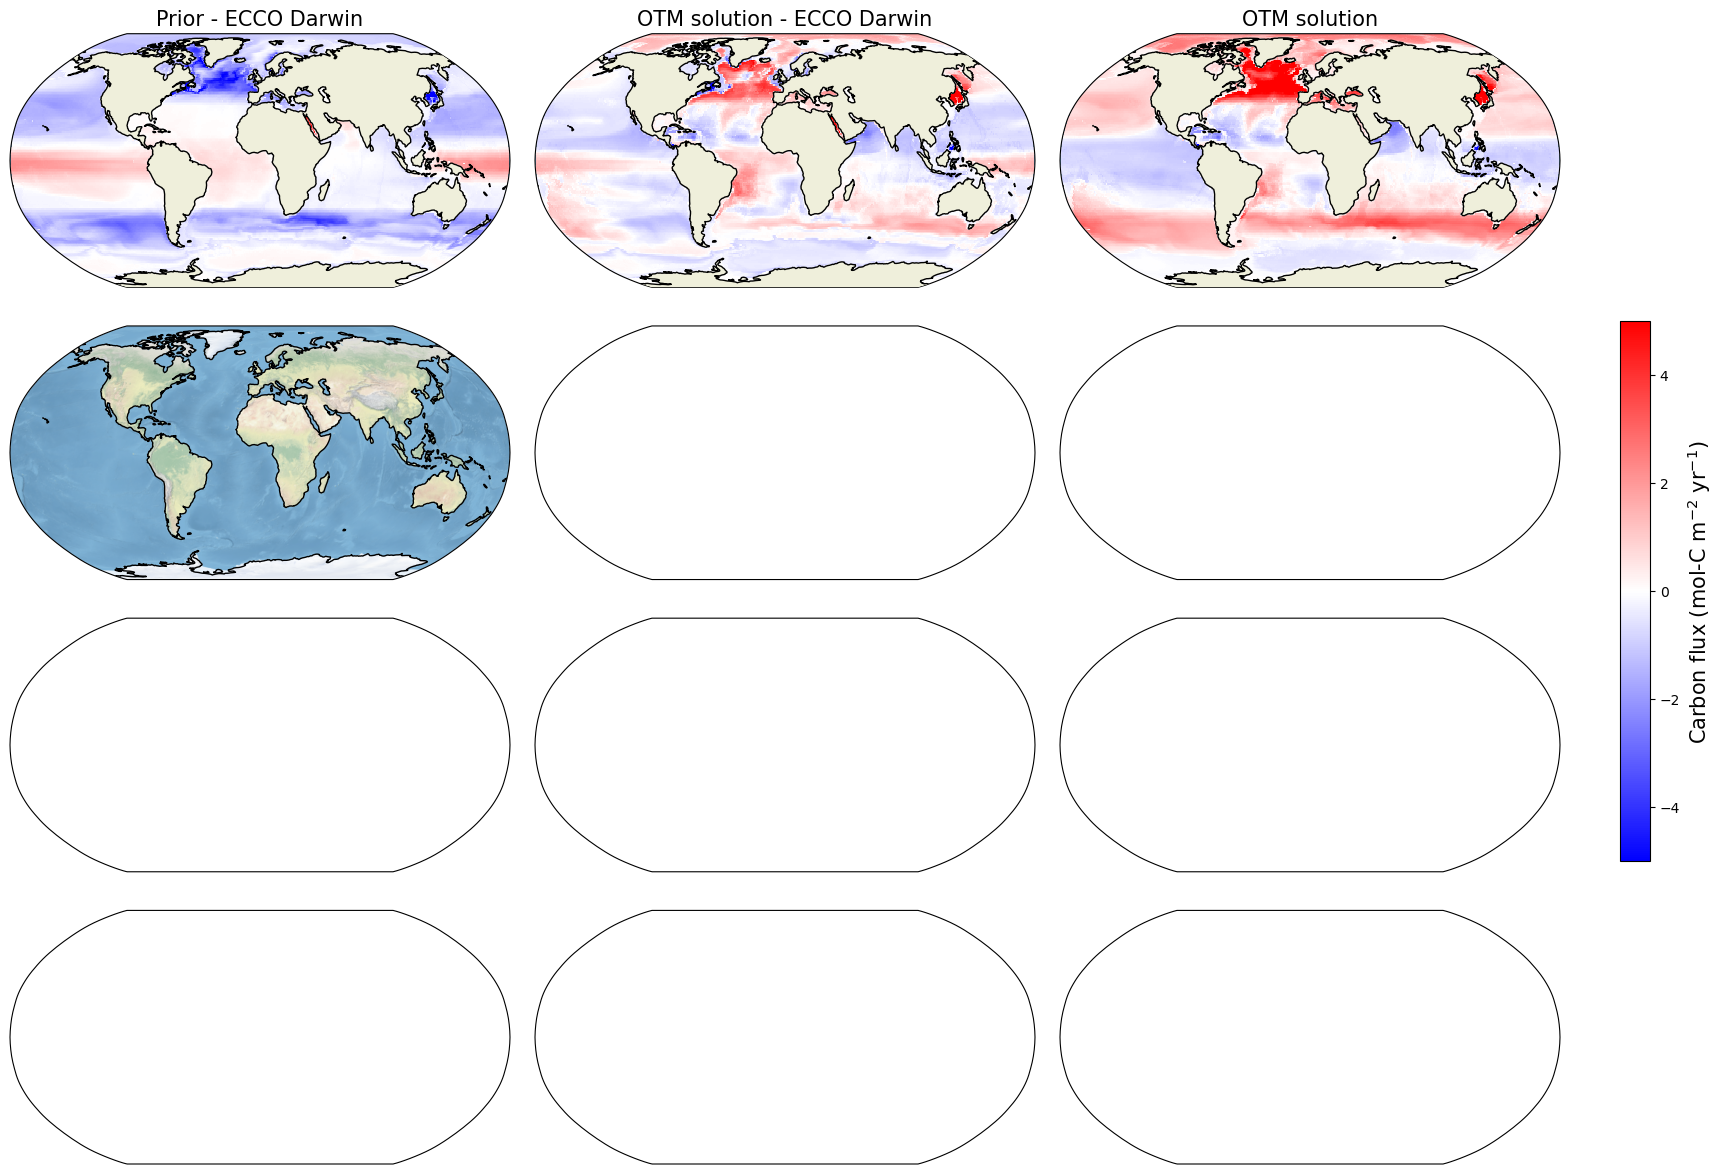

In [11]:
# Old 4x3 plot

fig = plt.figure(figsize = (20,15))

gs = gridspec.GridSpec(4,3)
gs.update(wspace = 0.05, hspace=0.05)
fs=15

ax1 = plt.subplot(gs[0,0], projection=ccrs.Robinson(central_longitude=0))
ax2 = plt.subplot(gs[0,1], projection=ccrs.Robinson(central_longitude=0))
ax3 = plt.subplot(gs[0,2], projection=ccrs.Robinson(central_longitude=0))

ax4 = plt.subplot(gs[1,0], projection=ccrs.Robinson(central_longitude=0))
ax5 = plt.subplot(gs[1,1], projection=ccrs.Robinson(central_longitude=0))
ax6 = plt.subplot(gs[1,2], projection=ccrs.Robinson(central_longitude=0))

ax7 = plt.subplot(gs[2,0], projection=ccrs.Robinson(central_longitude=0))
ax8 = plt.subplot(gs[2,1], projection=ccrs.Robinson(central_longitude=0))
ax9 = plt.subplot(gs[2,2], projection=ccrs.Robinson(central_longitude=0))

ax10 = plt.subplot(gs[3,0], projection=ccrs.Robinson(central_longitude=0))
ax11 = plt.subplot(gs[3,1], projection=ccrs.Robinson(central_longitude=0))
ax12 = plt.subplot(gs[3,2], projection=ccrs.Robinson(central_longitude=0))

minv1, maxv1 = -5,5
minv2, maxv2 = -5,5

cax = fig.add_axes([0.93, 0.32, 0.015, 0.36])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv1, maxv1)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('Carbon flux (mol-C m$^{-2}$ yr$^{-1})$',fontsize=fs)

# No prior

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, dC_prior_flux_noprior-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('Prior - ECCO Darwin',fontsize=fs)

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, dC_OTM_flux_noprior-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('OTM solution - ECCO Darwin',fontsize=fs)

ax3.stock_img()
ax3.coastlines(zorder=101)
ax3.pcolormesh(LON, LAT, dC_OTM_flux_noprior, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax3.add_feature(cfeature.LAND, zorder=100)
ax3.set_title('OTM solution',fontsize=fs)

# Normally distributed random errors

ax4.stock_img()
ax4.coastlines(zorder=101)
ax4.pcolormesh(LON, LAT, dC_prior_flux_normalerr-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax4.add_feature(cfeature.LAND, zorder=100)

ax5.stock_img()
ax5.coastlines(zorder=101)
ax5.pcolormesh(LON, LAT, dC_OTM_flux_normalerr-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax5.add_feature(cfeature.LAND, zorder=100)

ax6.stock_img()
ax6.coastlines(zorder=101)
ax6.pcolormesh(LON, LAT, dC_OTM_flux_normalerr, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax6.add_feature(cfeature.LAND, zorder=100)

# Lower bound

ax7.stock_img()
ax7.coastlines(zorder=101)
ax7.pcolormesh(LON, LAT, dC_prior_flux_lb-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax7.add_feature(cfeature.LAND, zorder=100)

ax8.stock_img()
ax8.coastlines(zorder=101)
ax8.pcolormesh(LON, LAT, dC_OTM_flux_lb-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax8.add_feature(cfeature.LAND, zorder=100)

ax9.stock_img()
ax9.coastlines(zorder=101)
ax9.pcolormesh(LON, LAT, dC_OTM_flux_lb, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax9.add_feature(cfeature.LAND, zorder=100)

# Upper bound

ax10.stock_img()
ax10.coastlines(zorder=101)
ax10.pcolormesh(LON, LAT, dC_prior_flux_ub-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax10.add_feature(cfeature.LAND, zorder=100)

ax11.stock_img()
ax11.coastlines(zorder=101)
ax11.pcolormesh(LON, LAT, dC_OTM_flux_ub-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv1, vmax=maxv1, cmap=plt.cm.bwr)
ax11.add_feature(cfeature.LAND, zorder=100)

ax12.stock_img()
ax12.coastlines(zorder=101)
ax12.pcolormesh(LON, LAT, dC_OTM_flux_ub, transform = ccrs.PlateCarree(), vmin=minv2, vmax=maxv2, cmap=plt.cm.bwr)
ax12.add_feature(cfeature.LAND, zorder=100)


label_fontsize = 15

ax1.text(-0.05, 0.5, 'Case 1', transform=ax1.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)
ax4.text(-0.05, 0.5, 'Case 2', transform=ax4.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)
ax7.text(-0.05, 0.5, 'Case 3', transform=ax7.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)
ax10.text(-0.05, 0.5, 'Case 4', transform=ax10.transAxes, rotation=90, va='center', ha='center', fontsize=label_fontsize)

ax1.text(0.05,0.95, '(a)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax2.text(1.1,0.95, '(b)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax3.text(2.15,0.95, '(c)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax4.text(0.05,-0.2, '(d)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax5.text(1.1,-0.2, '(e)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax6.text(2.15,-0.2, '(f)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax7.text(0.05,-1.35, '(g)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax8.text(1.1,-1.35, '(h)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax9.text(2.15,-1.35, '(i)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax10.text(0.05,-2.5, '(j)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax11.text(1.1,-2.5, '(k)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)
ax12.text(2.15,-2.5, '(l)', transform=ax1.transAxes, va='center', ha='center', fontsize=label_fontsize)


#plt.savefig('allpriors_v2_remapped.png', bbox_inches='tight', dpi=300, transparent=True)        